In [1]:
def radioactive_decay(t, N0, half_life):
    return N0*(1/2)**(t/half_life)

In [2]:
import numpy as np
half_life = 24110 # years
t = np.arange(0,half_life*10,100)
amount_remaining = radioactive_decay(t,1,half_life)

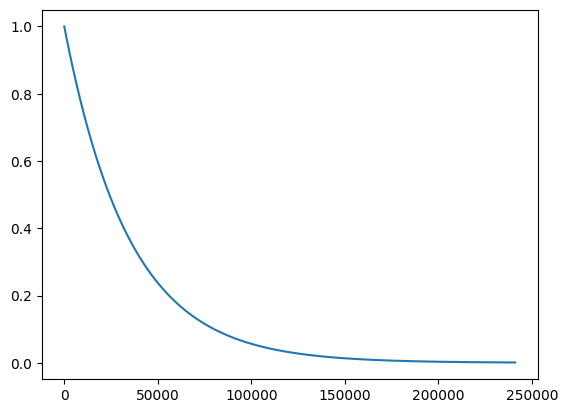

In [3]:
import matplotlib.pyplot as plt
plt.plot(t, amount_remaining)

In [4]:
a = 0.1
b = -a
r = b + (a-b) * np.random.rand(len(t),1)
r = r.flatten()

amount_remaining = amount_remaining+r
amount_remaining = amount_remaining.flatten()
print(len(r))
print(len(t))
print(np.shape(amount_remaining))
print(amount_remaining[0], r[0])

2411
2411
(2411,)
1.0030034162546189 0.0030034162546188903


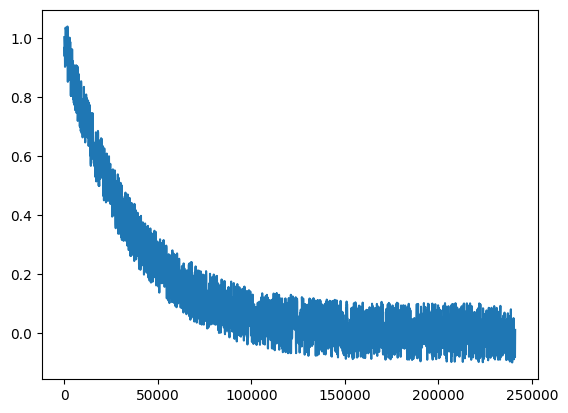

In [5]:
import matplotlib.pyplot as plt
plt.plot(t, amount_remaining)

In [6]:
import pandas as pd
dataset = pd.DataFrame({'t (years)': t, 'N_t (g)': amount_remaining})
dataset

,t (years),N_t (g)
0,0,1.003003
1,100,0.970527
2,200,0.938309
3,300,0.970053
4,400,0.902556
...,...,...
2406,240600,-0.038446
2407,240700,-0.039000
2408,240800,-0.048025
2409,240900,-0.080716


In [7]:
dataset.to_csv("week2_slides.csv")

Coefficients: 
 [ 3.06094248e-01 -2.37635570e+02  5.10538048e+02  3.27729878e+02
 -8.14111926e+02  4.92799595e+02  1.02841240e+02  1.84603496e+02
  7.43509388e+02  7.60966464e+01]
Mean squared error: 2004.52
Coefficient of determination: 0.59


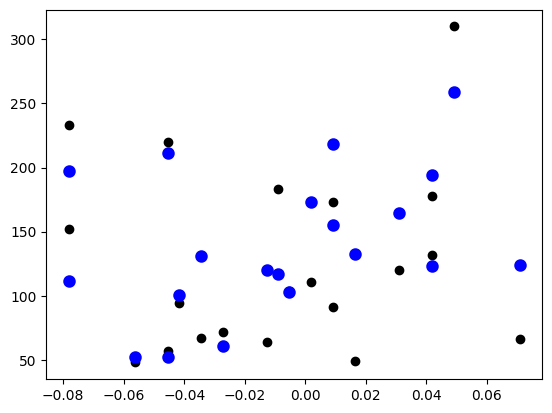

In [8]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
#diabetes_X = diabetes_X[:, np.newaxis, 2]



# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test[:,0], diabetes_y_test, color="black")
plt.scatter(diabetes_X_test[:,0], diabetes_y_pred, color="blue", linewidth=3)

plt.show()

In [9]:
diabetes_y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28